In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import geopandas as geopd
from shapely.geometry import Point

In [2]:
taksim_tweets = pd.read_csv("Data/geo_tagged_violence_labeled_tweets.csv")

In [5]:
taksim_tweets.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'created_at',
       'text', 'coordinates', 'place', 'user', 'long', 'lat', 'proccd_text',
       'prediction', 'non_vio_prob', 'vio_prob'],
      dtype='object')

In [6]:
taksim_tweets["created_at_dt"] = pd.to_datetime(taksim_tweets["created_at"])

In [7]:
taksim_tweets_dt = taksim_tweets.set_index(taksim_tweets["created_at_dt"])

In [8]:
len(taksim_tweets_dt.resample("D"))

27

In [9]:
len(taksim_tweets_dt.resample("H"))

620

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


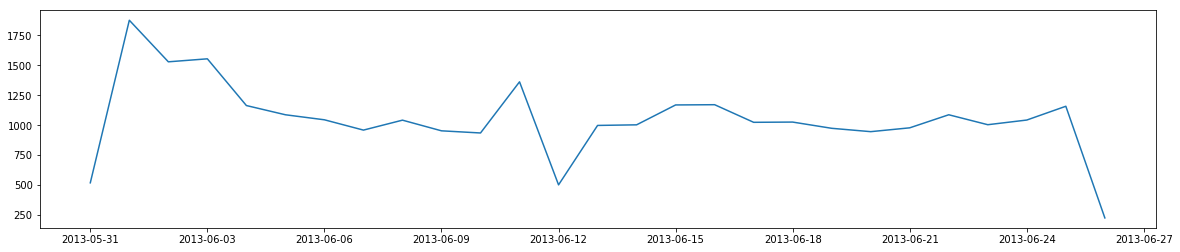

In [10]:
plt.figure(figsize=(20,4))

plt.plot(taksim_tweets_dt['prediction'].resample("D", how='count'))
plt.show()

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


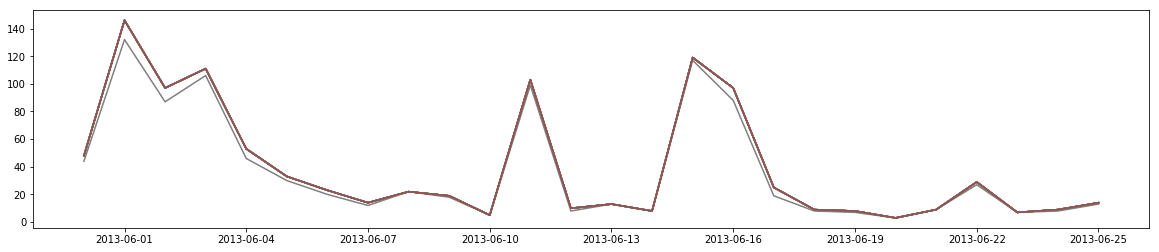

In [12]:
plt.figure(figsize=(20,4))

plt.plot(taksim_tweets_dt[taksim_tweets_dt['prediction']==1].resample("D", how='count'))
plt.show()

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


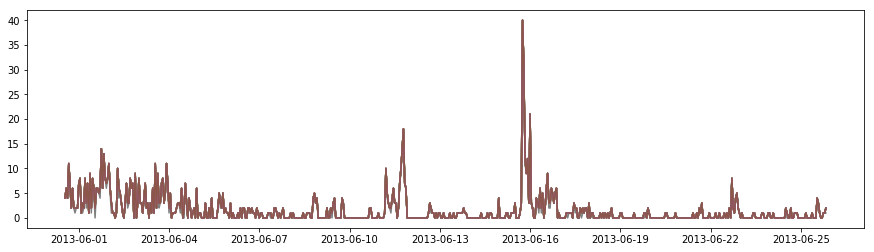

In [13]:
plt.figure(figsize=(15,4))

plt.plot(taksim_tweets_dt[taksim_tweets_dt['prediction']==1].resample("H", how='count'))
plt.show()

In [14]:
turkey_shp = geopd.read_file("Data/istanbul_turkey.imposm-shapefiles/istanbul_turkey_osm_admin.shp")

In [15]:
geometry = [Point(xy) for xy in zip(taksim_tweets.long, taksim_tweets.lat)]
taksim_tweets = geopd.GeoDataFrame(taksim_tweets, geometry = geometry )

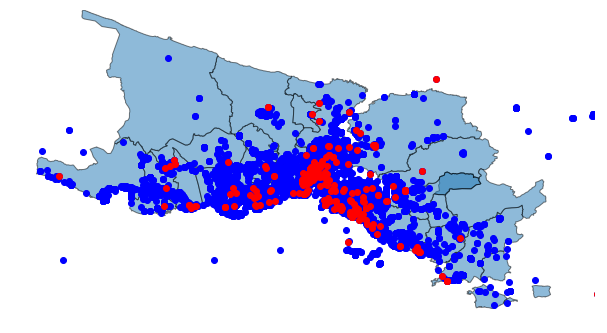

In [19]:
minx, miny, maxx, maxy = turkey_shp.total_bounds
ax = turkey_shp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(taksin_minx, taksim_maxx)
ax.set_ylim(taksim_miny, taksim_maxy)
taksim_tweets.plot(ax=ax, color='blue', alpha=1)
taksim_tweets[taksim_tweets['prediction'] == 1].plot(ax=ax, color='red', alpha=1)
ax.set_axis_off()
plt.show()